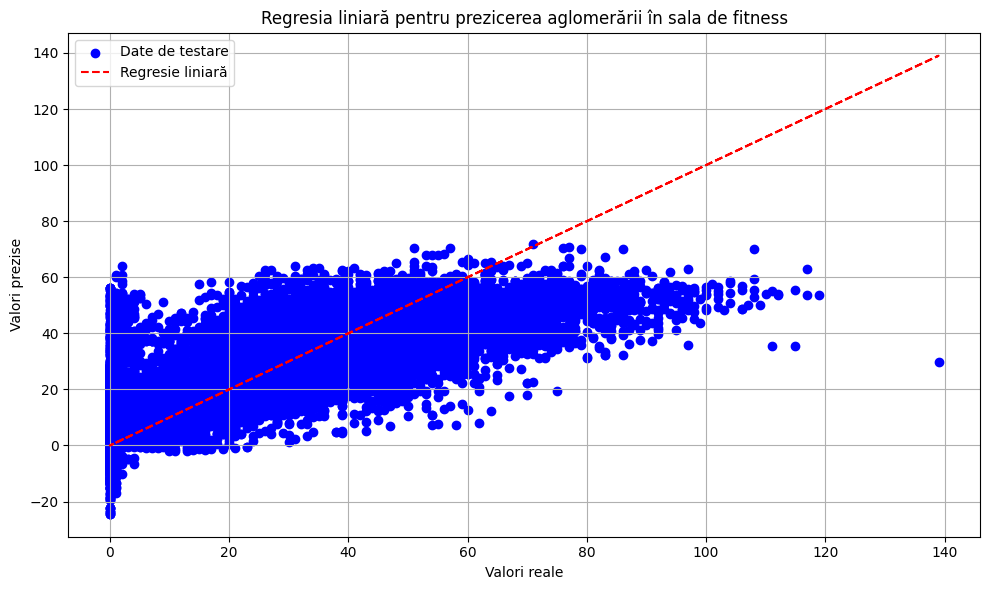

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Încărcarea datelor din fișierul CSV într-un DataFrame pandas
data = pd.read_csv('dataset.csv', header=None, names=['NumarOameni', 'Data', 'Timestamp', 'ZiSaptamana', 
                                                          'Weekend', 'ZiLibera', 'TemperaturaF', 'InceputSemestru', 
                                                          'TimpulSemestrului', 'Luna', 'Ora'])

# Selectarea caracteristicilor și a variabilei de răspuns
X = data[['ZiSaptamana', 'Weekend', 'ZiLibera', 'TemperaturaF', 'InceputSemestru', 'TimpulSemestrului', 'Luna', 'Ora']]
y = data['NumarOameni']

# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului de regresie liniară
model = LinearRegression()
model.fit(X_train, y_train)

# Efectuarea predicțiilor pe setul de testare
predictions = model.predict(X_test)

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Date de testare')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Regresie liniară')
plt.title('Regresia liniară pentru prezicerea aglomerării în sala de fitness')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


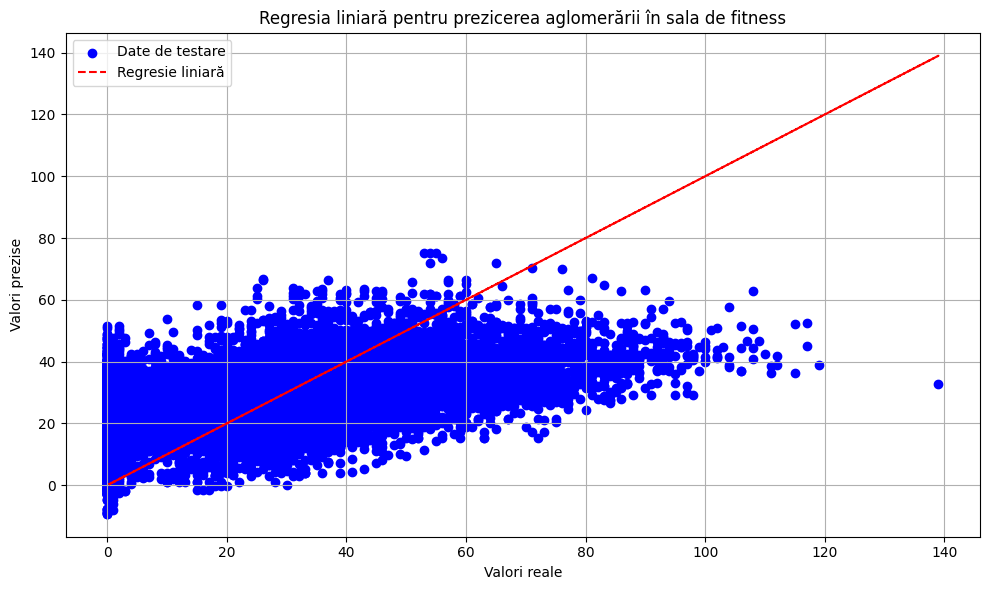

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Încărcarea datelor din fișierul CSV într-un DataFrame pandas
data = pd.read_csv('newDataSet.csv', header=None, names=['NumarOameni', 'Data', 'ZiSaptamana', 
                                                          'Weekend', 'ZiLibera', 'TemperaturaF', 'InceputSemestru', 
                                                          'TimpulSemestrului'])

# Selectarea caracteristicilor și a variabilei de răspuns
X = data[['ZiSaptamana', 'Weekend', 'ZiLibera', 'TemperaturaF', 'InceputSemestru', 'TimpulSemestrului']]
y = data['NumarOameni']

# Divizarea datelor în set de antrenament și set de testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inițializarea și antrenarea modelului de regresie liniară
model = LinearRegression()
model.fit(X_train, y_train)

# Efectuarea predicțiilor pe setul de testare
predictions = model.predict(X_test)

# Trasarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Date de testare')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Regresie liniară')
plt.title('Regresia liniară pentru prezicerea aglomerării în sala de fitness')
plt.xlabel('Valori reale')
plt.ylabel('Valori prezise')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# Eliminarea Timestamp, ora si luna pentru reducerea anomaliilor
import pandas as pd

data = pd.read_csv('dataset.csv', header=None) # Citire din fisier
data.drop(columns=[2], inplace=True) # Stergerea celor trei coloane
data.to_csv('modifiedDataSet.csv', header=False, index=False)  # Salvarea datelor


In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Citirea datelor din fișierul CSV într-un DataFrame pandas
data = pd.read_csv('modifiedDataSet.csv', header=None)

# Separarea caracteristicilor și variabilei de răspuns
X = data.iloc[:, 2:]  # Excludem primele două coloane (datetime și numărul de persoane în sală) pentru caracteristici
y = data.iloc[:, 0]   # Prima coloană (numărul de persoane în sală) este variabila de răspuns

# Inițierea unui model de regresie cu arbore de decizie
regressor = DecisionTreeRegressor(random_state=42)

# Antrenarea modelului pentru a calcula importanța caracteristicilor
regressor.fit(X, y)

# Extrage importanța caracteristicilor (indicele Gini) din model
importanta_caracteristici = regressor.feature_importances_

# Crearea unui DataFrame pentru a afișa importanța caracteristicilor
importanta_df = pd.DataFrame({'Caracteristica': X.columns, 'Importanta': importanta_caracteristici})

# Sortarea DataFrame după importanță pentru a vedea cele mai importante caracteristici
importanta_df = importanta_df.sort_values(by='Caracteristica', ascending=False)
print("2 -> Ziua saptamanii")
print("3 -> Daca este weekend")
print("4 -> Daca este sarbatoare")
print("5 ->  Temperatura in fahrenheit")
print("6 -> Daca este inceput de semestru")
print("7 -> Daca este in timpul semestrului")
print("8 -> Luna")
print("9 -> Ora")
print(importanta_df)


2 -> Ziua saptamanii
3 -> Daca este weekend
4 -> Daca este sarbatoare
5 ->  Temperatura in fahrenheit
6 -> Daca este inceput de semestru
7 -> Daca este in timpul semestrului
8 -> Luna
9 -> Ora
   Caracteristica  Importanta
7               9    0.526997
6               8    0.082710
5               7    0.113160
4               6    0.013751
3               5    0.170225
2               4    0.000105
1               3    0.024706
0               2    0.068347
